In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('testX12.csv')

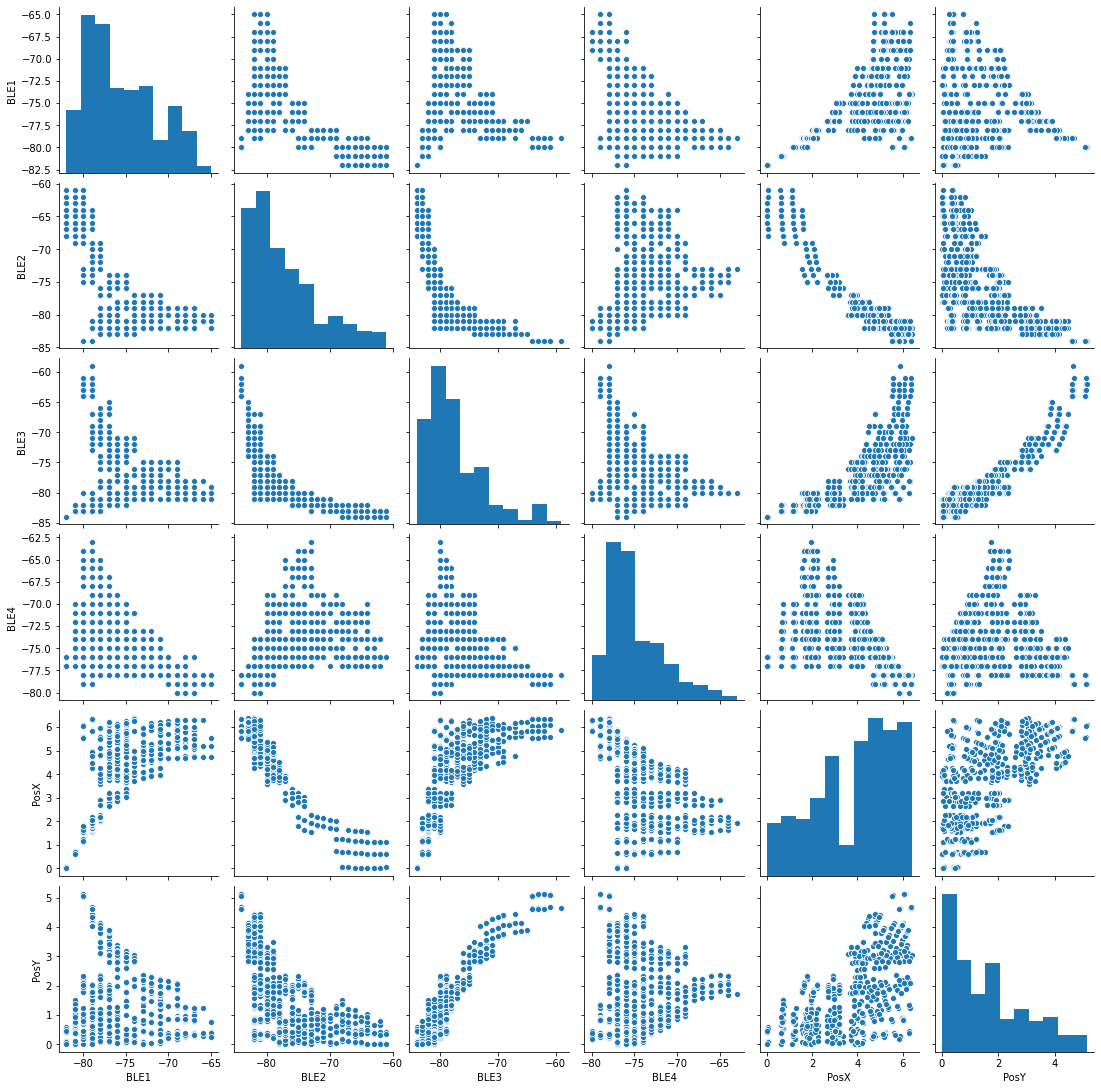

In [ ]:
df.head()
sns.pairplot(df)

In [ ]:
X = df[['BLE1', 'BLE2', 'BLE3', 'BLE4']]
y = df[['PosX', 'PosY']]
y.head()

,PosX,PosY
0,0.071584,0.124901
1,0.001470,0.474506
2,0.047313,0.407728
3,0.047313,0.407728
4,0.029339,0.022109


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [ ]:
model = Sequential()
# add layer ให้โมเดล
# input dimension = 4 เพราะมี 4 feature (BLE1-4)
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(2, activation='linear'))
# model.add(Dense(2))

In [ ]:
model.compile(loss='mse',
              optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=50, batch_size=10)

Epoch 1/50
68/68 [==============================] - 0s 923us/step - loss: 37.0305 - accuracy: 0.0625
Epoch 2/50
68/68 [==============================] - 0s 926us/step - loss: 2.2052 - accuracy: 0.4702
Epoch 3/50
68/68 [==============================] - 0s 925us/step - loss: 1.2235 - accuracy: 0.9360
Epoch 4/50
68/68 [==============================] - 0s 894us/step - loss: 0.7603 - accuracy: 0.9360
Epoch 5/50
68/68 [==============================] - 0s 966us/step - loss: 0.6362 - accuracy: 0.9360
Epoch 6/50
68/68 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.9360
Epoch 7/50
68/68 [==============================] - 0s 1ms/step - loss: 0.5975 - accuracy: 0.9360
Epoch 8/50
68/68 [==============================] - 0s 926us/step - loss: 0.5748 - accuracy: 0.9360
Epoch 9/50
68/68 [==============================] - 0s 982us/step - loss: 0.5546 - accuracy: 0.9360
Epoch 10/50
68/68 [==============================] - 0s 933us/step - loss: 0.5457 - accuracy: 0.9360
Ep

In [ ]:
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

9/9 [==============================] - 0s 1ms/step - loss: 0.4952 - accuracy: 0.9271
Accuracy: 92.71


In [ ]:
model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.4952 - accuracy: 0.9271


[0.4951549768447876, 0.9270833134651184]

In [ ]:
model.evaluate(X_train, Y_train)

21/21 [==============================] - 0s 842us/step - loss: 0.5030 - accuracy: 0.9360


[0.5029560923576355, 0.9360119104385376]

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
len(test_predictions)

288

In [ ]:
test_predictions

array([[1.1642052 , 0.29015923],
       [4.0969014 , 1.16143   ],
       [0.53064024, 0.17765766],
       [0.53064024, 0.17765766],
       [1.4490199 , 0.37477452],
       [3.7035925 , 1.0445825 ],
       [3.0727553 , 0.85716784],
       [4.9822636 , 1.9447782 ],
       [3.4454677 , 0.96789634],
       [2.466841  , 0.6771575 ],
       [6.0189786 , 4.544264  ],
       [5.953448  , 4.3946667 ],
       [3.3372128 , 0.9357351 ],
       [4.740396  , 1.3526045 ],
       [3.3653018 , 0.94408   ],
       [4.4209323 , 1.2576957 ],
       [0.94210684, 0.22417635],
       [5.079247  , 2.1367378 ],
       [5.436725  , 3.029218  ],
       [0.53064024, 0.17765766],
       [6.1336284 , 4.9419813 ],
       [1.1390474 , 0.28268513],
       [5.134007  , 2.1081643 ],
       [2.2730594 , 0.6195872 ],
       [5.9577127 , 4.357391  ],
       [2.563231  , 0.70579386],
       [1.9535918 , 0.52467704],
       [5.145163  , 2.0256188 ],
       [4.0018835 , 1.1332011 ],
       [5.7175126 , 3.8546422 ],
       [1.

In [ ]:
test_predictions = pd.Series(list(test_predictions))

In [ ]:
test_predictions

0       [1.1642052, 0.29015923]
1          [4.0969014, 1.16143]
2      [0.53064024, 0.17765766]
3      [0.53064024, 0.17765766]
4       [1.4490199, 0.37477452]
                 ...           
283      [5.3413744, 2.7351193]
284       [4.2906795, 1.218999]
285      [3.6354997, 1.0243528]
286       [5.450508, 2.9386766]
287    [0.53064024, 0.17765766]
Length: 288, dtype: object

In [ ]:
predictions_value_df = pd.DataFrame(Y_test)

In [ ]:
predictions_value_df.head()

,PosX,PosY
138,1.786511,0.262882
547,5.102022,0.352819
32,0.041742,0.537451
36,0.001470,0.018487
162,2.119508,0.601329


In [ ]:
predictions_value_df.reset_index(drop=True, inplace=True)
test_predictions.reset_index(drop=True, inplace=True)

In [ ]:
predictions_value_df = pd.concat([predictions_value_df, test_predictions], axis=1)

In [ ]:
predictions_value_df.columns = ['Test True PosX','Test True PosY','Predict']

In [ ]:
predictions_value_df

,Test True PosX,Test True PosY,Predict
0,1.786511,0.262882,"[1.1642052, 0.29015923]"
1,5.102022,0.352819,"[4.0969014, 1.16143]"
2,0.041742,0.537451,"[0.53064024, 0.17765766]"
3,0.001470,0.018487,"[0.53064024, 0.17765766]"
4,2.119508,0.601329,"[1.4490199, 0.37477452]"
...,...,...,...
283,4.504822,4.357122,"[5.3413744, 2.7351193]"
284,4.693718,0.880156,"[4.2906795, 1.218999]"
285,4.687374,0.958249,"[3.6354997, 1.0243528]"
286,4.980513,4.389716,"[5.450508, 2.9386766]"


In [ ]:
# predictions_value_df['Predict'] = predictions_value_df['Predict'].str[0]

In [ ]:
# predictions_value_df

In [ ]:
predictions_value_df['Predict'] = predictions_value_df['Predict'].astype(str) 

In [ ]:
predictions_value_df['Predict'] = predictions_value_df['Predict'].str.strip('[]')

In [ ]:
predictions_value_df

,Test True PosX,Test True PosY,Predict
0,1.786511,0.262882,1.1642052 0.29015923
1,5.102022,0.352819,4.0969014 1.16143
2,0.041742,0.537451,0.53064024 0.17765766
3,0.001470,0.018487,0.53064024 0.17765766
4,2.119508,0.601329,1.4490199 0.37477452
...,...,...,...
283,4.504822,4.357122,5.3413744 2.7351193
284,4.693718,0.880156,4.2906795 1.218999
285,4.687374,0.958249,3.6354997 1.0243528
286,4.980513,4.389716,5.450508 2.9386766


In [ ]:
# predictions_value_df[['Test Pred PosX']] = ""

In [ ]:
new = predictions_value_df.Predict.str.split(" ",n=1,expand=True)
# new.dropna(inplace=True)
new[1]

0       0.29015923
1        1.16143  
2       0.17765766
3       0.17765766
4       0.37477452
          ...     
283      2.7351193
284      1.218999 
285      1.0243528
286      2.9386766
287     0.17765766
Name: 1, Length: 288, dtype: object

In [ ]:
new[0]

0       1.1642052
1       4.0969014
2      0.53064024
3      0.53064024
4       1.4490199
          ...    
283     5.3413744
284     4.2906795
285     3.6354997
286      5.450508
287    0.53064024
Name: 0, Length: 288, dtype: object

In [ ]:
predictions_value_df['Test Pred PosX'] = new[0]

In [ ]:
predictions_value_df['Test Pred PosY'] = new[1]

In [ ]:
predictions_value_df

,Test True PosX,Test True PosY,Predict,Test Pred PosX,Test Pred PosY
0,1.786511,0.262882,1.1642052 0.29015923,1.1642052,0.29015923
1,5.102022,0.352819,4.0969014 1.16143,4.0969014,1.16143
2,0.041742,0.537451,0.53064024 0.17765766,0.53064024,0.17765766
3,0.001470,0.018487,0.53064024 0.17765766,0.53064024,0.17765766
4,2.119508,0.601329,1.4490199 0.37477452,1.4490199,0.37477452
...,...,...,...,...,...
283,4.504822,4.357122,5.3413744 2.7351193,5.3413744,2.7351193
284,4.693718,0.880156,4.2906795 1.218999,4.2906795,1.218999
285,4.687374,0.958249,3.6354997 1.0243528,3.6354997,1.0243528
286,4.980513,4.389716,5.450508 2.9386766,5.450508,2.9386766


In [ ]:
# predictions_value_df['Test Pred PosX'].dropna(inplace=True)

# predictions_value_df['Test Pred PosX'] = predictions_value_df['Test Pred PosX'].str.strip()
# predictions_value_df.drop(predictions_value_df[286:])
# predictions_value_df

In [ ]:
# predictions_value_df['Test Pred PosX'] = predictions_value_df['Test Pred PosX'].apply(lambda x: float(x.split()[0].replace(',', '')))

In [ ]:
predictions_value_df['Test Pred PosX'] = predictions_value_df['Test Pred PosX'].astype(float)
# predictions_value_df['Test Pred PosX'] = pd.to_numeric(predictions_value_df['Test Pred PosX'],errors='coerce')

In [ ]:
predictions_value_df['Test Pred PosY'] = predictions_value_df['Test Pred PosY'].astype(float)

In [ ]:
predictions_value_df.dtypes

Test True PosX    float64
Test True PosY    float64
Predict            object
Test Pred PosX    float64
Test Pred PosY    float64
dtype: object

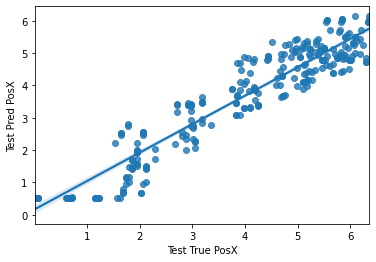

In [ ]:
sns.regplot(x='Test True PosX',y='Test Pred PosX',data = predictions_value_df)

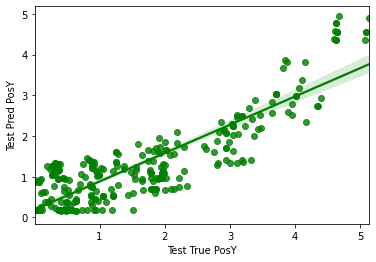

In [ ]:
sns.regplot(x='Test True PosY',y='Test Pred PosY',data = predictions_value_df ,color="g")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(predictions_value_df['Test True PosX'],predictions_value_df['Test Pred PosX'])

0.5520859766319445

In [ ]:
mean_absolute_error(predictions_value_df['Test True PosY'],predictions_value_df['Test Pred PosX'])

1.9150837799652776

In [ ]:
mean_squared_error(predictions_value_df['Test True PosX'],predictions_value_df['Test Pred PosX'])

0.4305600477795879

In [ ]:
mean_squared_error(predictions_value_df['Test True PosX'],predictions_value_df['Test Pred PosX'])

0.4305600477795879